In [1]:
import numpy as np

In [13]:
a = np.array([[1,2], [3,4]], ndmin = 3, dtype = 'i8')

In [14]:
a

array([[[1, 2],
        [3, 4]]], dtype=int64)

In [21]:
points = np.genfromtxt('./ShangGuiGu/data.csv', delimiter=',')

In [22]:
#定义损失函数,w,b计算好传入，再传输标准值，从而求导误差
#模块：损失函数
def compete_cost(w, b, points):
    total_cost = 0
    
    #求误差
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - w*x - b ) ** 2
        
    return total_cost/len(points)
    

#定义拟合算法，求取w和b

In [23]:
#根据线性回归的求取方法，我们需要定义一个平均值的函数
def average(data):
    sum = 0
    for i in range(len(data)):
        sum += data[i]
    return sum/len(data)

#根据公式，定义最重要的拟合函数，这里求取的就是w和b这两组系数
#将w,b代入误差函数之后，就可以得到线性误差
#深度学习的话，就是可以不断调整w和b，直到求取到最合适的权重和偏差，
#也就是所谓的训练过程

In [26]:
#拟合函数
def fit(points):
    M = len(points)
    x_bar = average(points[:, 0])
    
    sum_yx = 0
    sum_x2 = 0
    b = 0
    
    for i in range(M):
        x = points[i, 0]
        y = points[i ,1]
        sum_yx += y * (x - x_bar)
        sum_x2 += x ** 2
        
    #根据公式
    w = sum_yx / (sum_x2 - M * (x_bar ** 2))
    
    for i in range(M):
        x = points[i, 0]
        y = points[i ,1]
        b += (1/M)*(y - w*x)
    b = b
    return w, b


In [27]:
#测试
w, b = fit(points)

print("w is:", w)
print("b is:", b)

cost = compete_cost(w, b, points)

print("cost is:", cost)

w is: 1.32243102276
b is: 7.99102098227
cost is: 110.257383466


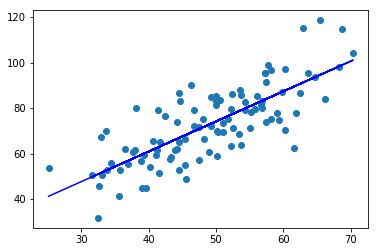

In [30]:
#画线
import matplotlib.pyplot as plt

x = points[:, 0]
y = points[:, 1]
plt.scatter(x, y)
pred_y = w*x + b

plt.plot(x, pred_y, c='b')
plt.show()

# 最小二乘法

# 模块0 引入包

In [2]:
import numpy as np
#画线
import matplotlib.pyplot as plt

# 模块1 加入数据

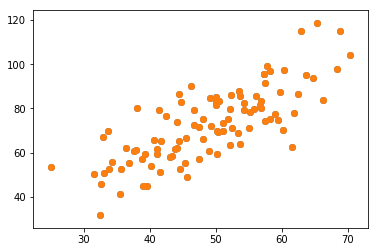

In [92]:
points = np.genfromtxt('./ShangGuiGu/data.csv', delimiter=',')
points[0,0]

# 提取points中的两列数据，分别作为x，y
x = points[:, 0]
y = points[:, 1]

# 用plt画出散点图
plt.scatter(x, y)
plt.show()

# 模块2 定义损失函数

模块2之前的属于预处理方面的，都是一些常规性的导入

In [52]:
#定义损失函数,w,b计算好传入，再传输标准值，从而求导误差
#模块：损失函数
def compete_cost(w, b, points):
    total_cost = 0
    
    #求误差
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += (y - w*x - b ) ** 2
        
    return total_cost/len(points)

# 模块3 超参数的选取，初始化定义

In [57]:
alpha = 0.0002
init_w = 0
init_b = 0
num_iter = 10

# 模块4 定义梯度下降算法函数

In [58]:
#训练函数  需要：原始数据、权重、偏置、学习率、训练次数  还有最重要的梯度更新函数
def grad_desc(points, init_w, init_b, alpha, num_iter):
    w = init_w
    b = init_b
    
    #定义一个list保存所有的损失函数值，用来显示下降的过程
    cost_list = []
    
    #训练过程
    for i in range(num_iter):
        cost_list.append( compete_cost(w, b, points))
        w, b = step_grad_desc(w, b, alpha, points)
        
    return [w, b, cost_list]

#传说中的梯度更新函数，也就是夹杂求导函数（我们所说的算法就放在这里）的更新函数
def step_grad_desc(current_w, current_b, alpha, points):
    #根据公式，我们就可以对应公式，将每一项表示并求出来（变量也是根据这个来定义）
    #以后的设计也是这样，1弄好算法2根据化简后的算法，定义出相应的函数
    #代码秘诀：一个求和符号 = 一个for循环，+= 用一个sum_来接收就好 而且此处还是一个大局部的变量
    #公式秘诀：看公式的最简式，看看可不可以化简，另一种方式就是一层一层往上代
    #最原始的式子，把式子弄成已知的情况
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    #根据公式写
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        sum_grad_w += (current_w * x + current_b - y) * x
        sum_grad_b += current_w * x + current_b - y
        
    #用公式求当前梯度
    grad_w = 2/M * sum_grad_w
    
    grad_b = 2/M * sum_grad_b
    
    #梯度下降
    updated_w = current_w - alpha * grad_w
    updated_b = current_b - alpha * grad_b
    
    return updated_w, updated_b
    

# 模块5 测试

w is:1.47889716658
b is:0.0302695513913
cost is:112.649944257


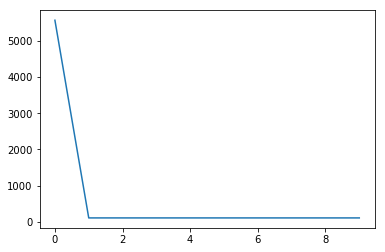

In [59]:
w, b, cost_list = grad_desc(points, init_w, init_b, alpha, num_iter)

print("w is:%s" % w)
print("b is:%s" % b)

cost = compete_cost(w, b, points)
print("cost is:%s" % cost)


plt.plot(cost_list)
plt.show()

    

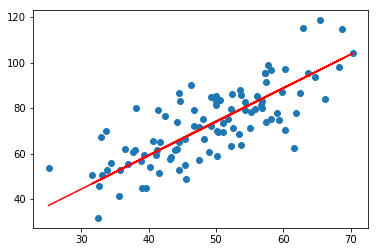

In [60]:
x = points[:, 0]
y = points[:, 1]

plt.scatter(x, y)
pred_y = w*x + b

plt.plot(x, pred_y, c='r')
plt.show()

# 调用库进行开发

In [63]:
import numpy as np
import matplotlib.pyplot as plt

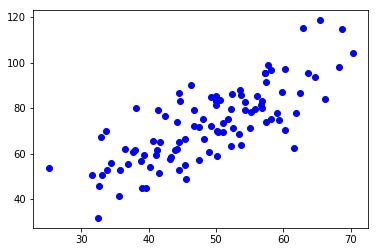

In [99]:
points = np.genfromtxt('./ShangGuiGu/data.csv', delimiter=',')

points[0,0]

# 提取points中的两列数据，分别作为x，y
x = points[:, 0]
y = points[:, 1]

# 用plt画出散点图
plt.scatter(x, y, c='b')
plt.show()

In [66]:
# 损失函数是系数的函数，另外还要传入数据的x，y
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ( y - w * x - b ) ** 2
    
    return total_cost/M

In [67]:
#前三步都是一样的，之后就算是框架不同，也只是顺序不一样而已

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x_new = x.reshape(-1, 1)
y_new = y.reshape(-1, 1)

lr.fit(x_new, y_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
## 从训练好的模型中提取系数和截距
w = lr.coef_[0][0]
b = lr.intercept_[0]

print("w is: ", w)
print("b is: ", b)

cost = compute_cost(w, b, points)

print("cost is: ", cost)

w is:  1.32243102276
b is:  7.99102098227
cost is:  110.257383466


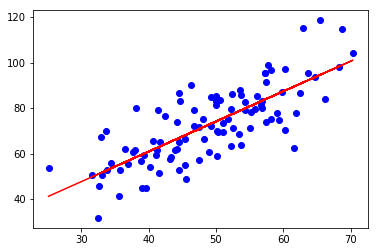

In [100]:
plt.scatter(x, y, c='b')
# 针对每一个x，计算出预测的y值
pred_y = w * x + b

plt.plot(x, pred_y, c='r')
plt.show()